In [1]:

import sys
!{sys.executable} -m pip install pandas-profiling

In [2]:
import nltk
from nltk.corpus import stopwords

# Punkt permite separar un texto en frases.
nltk.download('punkt')


nltk.download('wordnet')



nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys

from sklearn.ensemble import RandomForestClassifier


from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer


import re, string, unicodedata
#import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt


import pandas as pd
# Para preparar los datos
# Para crear el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Para usar KNN como clasificador
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Versiones anteriores a 1.2 de sklearn: from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import sklearn as sklearn


In [4]:
df = pd.read_csv('cat_6716.csv', delimiter=',')
unlabel=pd.read_csv('SinEtiquetatest_cat_6716.csv', delimiter=',')



# Asignación a una nueva variable de los datos leidos
data_t=df

data_t

,Textos_espanol,sdg
0,"Es importante destacar que, en un año de sequí...",6
1,Hay una gran cantidad de literatura sobre Aust...,6
2,"Los procesos de descentralización, emprendidos...",6
3,Esto puede tener consecuencias sustanciales pa...,6
4,La función de beneficio también incorpora pará...,6
...,...,...
2995,"""Forjando una Convención para los Crímenes con...",16
2996,"En 2016, Daragh Murray publicó su libro Obliga...",16
2997,"En este libro, el autor argumenta que el activ...",16
2998,"* Facultad de Derecho, Universidad de Manchest...",16


In [5]:
textos = data_t.copy()


import statistics

textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
moda_longitud = statistics.mode([len(x) for x in textos['Textos_espanol']])
textos['Moda'] = [moda_longitud] * len(textos)

textos['Max'] = [max([len(x) for x in textos['Textos_espanol']])] * len(textos)
textos['Min'] = [min([min([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']])] * len(textos)


print(textos)

                                         Textos_espanol  sdg  Conteo  Moda  \
0     Es importante destacar que, en un año de sequí...    6     621   468   
1     Hay una gran cantidad de literatura sobre Aust...    6     881   468   
2     Los procesos de descentralización, emprendidos...    6     579   468   
3     Esto puede tener consecuencias sustanciales pa...    6     706   468   
4     La función de beneficio también incorpora pará...    6     673   468   
...                                                 ...  ...     ...   ...   
2995  "Forjando una Convención para los Crímenes con...   16    1056   468   
2996  En 2016, Daragh Murray publicó su libro Obliga...   16     942   468   
2997  En este libro, el autor argumenta que el activ...   16     749   468   
2998  * Facultad de Derecho, Universidad de Manchest...   16     993   468   
2999  Este caso 1 constituye el primer pronunciamien...   16     618   468   

       Max  Min  
0     1616    0  
1     1616    0  
2     161

In [6]:
no_label = unlabel.copy()


import statistics

no_label['Conteo'] = [len(x) for x in no_label['Textos_espanol']]
moda_longitud = statistics.mode([len(x) for x in no_label['Textos_espanol']])
no_label['Moda'] = [moda_longitud] * len(no_label)

no_label['Max'] = [max([len(x) for x in textos['Textos_espanol']])] * len(no_label)
no_label['Min'] = [min([min([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']])] * len(no_label)

print(no_label)


                                        Textos_espanol  sdg  Conteo  Moda  \
0    1. 1. Introducción: Las Estructuras del Derech...  NaN     764   782   
1    Las aguas subterráneas se han debatido en el c...  NaN     936   782   
2    La presente contribución evalúa la jurispruden...  NaN    1022   782   
3    Sin embargo, este crédito fiscal expira en 201...  NaN     515   782   
4    Este estudio explora las actitudes, comportami...  NaN    1155   782   
..                                                 ...  ...     ...   ...   
975  Este artículo explora la historia y el impacto...  NaN    1043   782   
976  Mientras que algunos dan mayor énfasis a la ma...  NaN     512   782   
977  Una innovación importante para garantizar el s...  NaN     482   782   
978  El Salvador continúa luchando con niveles elev...  NaN     793   782   
979  También puede reflejar una baja conciencia sob...  NaN     794   782   

      Max  Min  
0    1616    0  
1    1616    0  
2    1616    0  
3    16

In [7]:
data_t.duplicated().sum()


0

In [8]:
unlabel.duplicated().sum()


0

In [9]:
unlabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  980 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 15.4+ KB



## Preparación de datos

In [10]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [11]:
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()  # Convierte la palabra a minúsculas
        new_words.append(new_word)
    return new_words

In [12]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [13]:
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

In [14]:
def remove_stopwords(words):

    stop_words = set(stopwords.words('spanish'))  # Utilizamos 'spanish' para obtener la lista de palabras vacías en español
    new_words = [word for word in words if word.lower() not in stop_words]
    return new_words

In [15]:
def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [16]:
data_t['palabras'] = data_t['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t.head()

,Textos_espanol,sdg,palabras
0,"Es importante destacar que, en un año de sequí...",6,"[importante, destacar, ano, sequia, espera, di..."
1,Hay una gran cantidad de literatura sobre Aust...,6,"[gran, cantidad, literatura, australia, area, ..."
2,"Los procesos de descentralización, emprendidos...",6,"[procesos, descentralizacion, emprendidos, ser..."
3,Esto puede tener consecuencias sustanciales pa...,6,"[puede, tener, consecuencias, sustanciales, ca..."
4,La función de beneficio también incorpora pará...,6,"[funcion, beneficio, tambien, incorpora, param..."


In [17]:
unlabel['palabras'] = unlabel['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
unlabel.head()

,Textos_espanol,sdg,palabras
0,1. 1. Introducción: Las Estructuras del Derech...,NaN,"[one, one, introduccion, estructuras, derecho,..."
1,Las aguas subterráneas se han debatido en el c...,NaN,"[aguas, subterraneas, debatido, contexto, tari..."
2,La presente contribución evalúa la jurispruden...,NaN,"[presente, contribucion, evalua, jurisprudenci..."
3,"Sin embargo, este crédito fiscal expira en 201...",NaN,"[embargo, credito, fiscal, expira, two thousan..."
4,"Este estudio explora las actitudes, comportami...",NaN,"[estudio, explora, actitudes, comportamientos,..."


In [18]:
stemmer = SnowballStemmer("spanish")
lemmatizer = WordNetLemmatizer()

# Función para realizar stemming y lematización en español
def stem_and_lemmatize(words):
    stems = [stemmer.stem(word) for word in words]
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return stems + lemmas



In [19]:
data_t['palabras'] = data_t['palabras'].apply(stem_and_lemmatize)
data_t.head()
data_t.size

9000

In [20]:
unlabel['palabras'] = unlabel['palabras'].apply(stem_and_lemmatize)
unlabel.head()

,Textos_espanol,sdg,palabras
0,1. 1. Introducción: Las Estructuras del Derech...,NaN,"[one, one, introduccion, estructur, derech, pe..."
1,Las aguas subterráneas se han debatido en el c...,NaN,"[agu, subterran, debat, context, tarif, financ..."
2,La presente contribución evalúa la jurispruden...,NaN,"[present, contribucion, evalu, jurisprudent, t..."
3,"Sin embargo, este crédito fiscal expira en 201...",NaN,"[embarg, credit, fiscal, expir, two thousand a..."
4,"Este estudio explora las actitudes, comportami...",NaN,"[estudi, explor, actitud, comport, percepcion,..."


In [21]:
data_t['palabras'] = data_t['palabras'].apply(lambda x: ' '.join(map(str, x)))
data_t

,Textos_espanol,sdg,palabras
0,"Es importante destacar que, en un año de sequí...",6,import destac ano sequi esper disminu aport au...
1,Hay una gran cantidad de literatura sobre Aust...,6,gran cantid literatur australi are sugier fuer...
2,"Los procesos de descentralización, emprendidos...",6,proces descentraliz emprend seri activ realiz ...
3,Esto puede tener consecuencias sustanciales pa...,6,pued ten consecuent sustancial calid agu espec...
4,La función de beneficio también incorpora pará...,6,funcion benefici tambi incorpor parametr afect...
...,...,...,...
2995,"""Forjando una Convención para los Crímenes con...",16,forj convencion crimen human inclu text conven...
2996,"En 2016, Daragh Murray publicó su libro Obliga...",16,two thousand and sixt daragh murray public lib...
2997,"En este libro, el autor argumenta que el activ...",16,libr autor argument activ judicial dirig prote...
2998,"* Facultad de Derecho, Universidad de Manchest...",16,facult derech univers manchest one sw v secret...


In [22]:
unlabel['palabras'] = unlabel['palabras'].apply(lambda x: ' '.join(map(str, x)))
unlabel

,Textos_espanol,sdg,palabras
0,1. 1. Introducción: Las Estructuras del Derech...,NaN,one one introduccion estructur derech penal tw...
1,Las aguas subterráneas se han debatido en el c...,NaN,agu subterran debat context tarif financi ocde...
2,La presente contribución evalúa la jurispruden...,NaN,present contribucion evalu jurisprudent tribun...
3,"Sin embargo, este crédito fiscal expira en 201...",NaN,embarg credit fiscal expir two thousand and tw...
4,"Este estudio explora las actitudes, comportami...",NaN,estudi explor actitud comport percepcion etic ...
...,...,...,...
975,Este artículo explora la historia y el impacto...,NaN,articul explor histori impact accion afirm ser...
976,Mientras que algunos dan mayor énfasis a la ma...,NaN,mientr dan mayor enfasis manipul preci financi...
977,Una innovación importante para garantizar el s...,NaN,innov import garantiz soport efect tgc tecnolo...
978,El Salvador continúa luchando con niveles elev...,NaN,salvador continu luch nivel elev violenci crim...


In [23]:
X_data, y_data = data_t['palabras'],data_t['sdg']
y_data


y_data.value_counts()

6     1000
7     1000
16    1000
Name: sdg, dtype: int64

In [24]:
X_noetiqueta, y_noetiqueta = unlabel['palabras'],unlabel['sdg']

y_noetiqueta.value_counts()

Series([], Name: sdg, dtype: int64)

In [25]:
X_noetiqueta.isna().sum()

0

In [41]:
vectorizer = CountVectorizer(binary=True)
X_dummy = vectorizer.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(3000, 28178)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
X2_dummy = vectorizer.transform(X_noetiqueta)
X2_dummy.toarray()[0]

(3000, 28178)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Modelo Random Forest

In [43]:
rf_model = RandomForestClassifier(random_state=1)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, y_data, test_size=0.2, random_state=0)

In [45]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [46]:
preds_train_rf = rf_model.predict(X_train)
preds_test_rf = rf_model.predict(X_test)

In [47]:
cm_train_rf = confusion_matrix(Y_train, preds_train_rf, labels=rf_model.classes_)
cm_train_norm_rf = confusion_matrix(Y_train, preds_train_rf, labels=rf_model.classes_, normalize='all')
cm_test_rf = confusion_matrix(Y_test, preds_test_rf, labels=rf_model.classes_)
cm_test_norm_rf = confusion_matrix(Y_test, preds_test_rf, labels=rf_model.classes_, normalize='all')

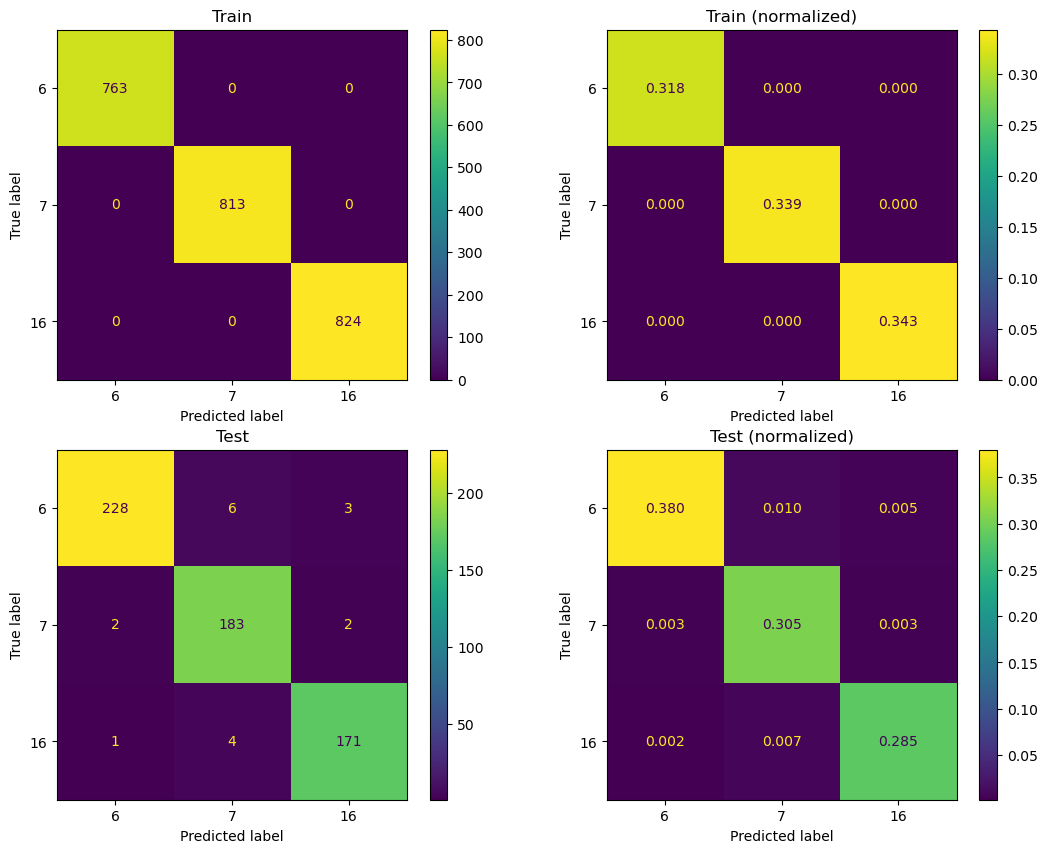

In [48]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 10))
ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=rf_model.classes_).plot(ax=ax1, values_format=',.0f')
ConfusionMatrixDisplay(confusion_matrix=cm_train_norm_rf, display_labels=rf_model.classes_).plot(ax=ax2, values_format='.3f')
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=rf_model.classes_).plot(ax=ax3, values_format=',.0f')
ConfusionMatrixDisplay(confusion_matrix=cm_test_norm_rf, display_labels=rf_model.classes_).plot(ax=ax4, values_format='.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [34]:
metrics_df = pd.DataFrame([
    {
        'Train': accuracy_score(Y_train, preds_train_rf),
        'Test': accuracy_score(Y_test, preds_test_rf)
    },
    {
        'Train': precision_score(Y_train, preds_train_rf, average='weighted'),
        'Test': precision_score(Y_test, preds_test_rf, average='weighted')
    },
    {
        'Train': recall_score(Y_train, preds_train_rf, average='weighted'),
        'Test': recall_score(Y_test, preds_test_rf, average='weighted')
    },
    {
        'Train': f1_score(Y_train, preds_train_rf, average='weighted'),
        'Test': f1_score(Y_test, preds_test_rf, average='weighted')
    }
], index=['Accuracy', 'Precision', 'Recall', 'F1'])
print(metrics_df)

           Train      Test
Accuracy     1.0  0.970000
Precision    1.0  0.970388
Recall       1.0  0.970000
F1           1.0  0.970056


In [49]:
import pandas as pd

# Convertir la matriz dispersa a un DataFrame
X_df = pd.DataFrame(X_train.toarray())

In [36]:
from sklearn.tree import export_text

# Obtener un árbol específico del modelo
tree = rf_model.estimators_[0]

# Visualizar el árbol en texto
tree_text = export_text(tree, feature_names=X_df.columns.tolist())
print(tree_text)


|--- 27224 <= 0.50
|   |--- 12849 <= 0.50
|   |   |--- 26848 <= 0.50
|   |   |   |--- 26096 <= 0.50
|   |   |   |   |--- 8116 <= 0.50
|   |   |   |   |   |--- 10051 <= 0.50
|   |   |   |   |   |   |--- 7223 <= 0.50
|   |   |   |   |   |   |   |--- 25656 <= 0.50
|   |   |   |   |   |   |   |   |--- 1476 <= 0.50
|   |   |   |   |   |   |   |   |   |--- 7054 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- 18854 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 68
|   |   |   |   |   |   |   |   |   |   |--- 18854 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- 7054 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- 22515 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- 22515 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- 1476 >  0.50
| 

In [50]:
predcition=rf_model.predict(X2_dummy)


In [51]:
print(predcition)

[16  6 16  7 16 16  6 16 16  7 16  7  7 16 16  6 16  6 16 16 16 16 16  6
  7  7 16 16 16 16 16 16 16 16 16  7 16 16  7 16  7 16 16  7 16 16 16 16
 16 16 16 16 16  6 16  7 16 16 16  6  7 16 16  7  7 16  6  7 16 16  6 16
  7 16 16  7 16  7 16 16 16  6 16 16  7 16 16  7 16 16 16 16 16 16  7  7
 16  6  7  7 16  7 16 16 16 16  7 16 16  7 16  7  6 16 16 16 16 16 16  7
  7  7 16 16 16 16 16 16 16  7  7  7  7 16  7  7  7 16  6 16 16 16  7 16
 16  7 16 16  6 16 16 16 16  7 16 16 16 16  7 16 16 16  7 16 16 16  6 16
 16  7  7  6 16  6 16 16 16  7 16  7 16 16 16 16 16 16  7  7 16 16 16  7
 16  6  7 16  7 16 16 16  6 16 16  7  7 16 16 16 16 16  6  6 16 16 16 16
  7 16 16 16 16 16 16  6 16  7 16 16  7  7 16 16 16 16 16 16 16 16 16 16
  6 16 16 16 16 16 16 16 16 16 16 16  7  7  6  7  7  7 16  7 16 16 16 16
 16  7  7 16  6 16 16  7 16  7 16 16  7  7 16 16 16 16 16 16  7 16 16 16
 16  7 16 16 16 16 16 16 16 16 16 16 16  7 16  6 16  6 16  6 16 16 16 16
 16 16 16  7  7  7  6 16 16  7 16 16  7 16 16  7 16

In [57]:
# Exportar modelo
import joblib


joblib.dump(rf_model, './modelo_random_forest.joblib')
# Exportar vectorizer


['./modelo_random_forest.joblib']

In [58]:
joblib.dump(vectorizer, './vectorizer.joblib')

['./vectorizer.joblib']

In [59]:
unlabel["sdg"]=predcition

In [60]:
unlabel.head()

,Textos_espanol,sdg,palabras
0,1. 1. Introducción: Las Estructuras del Derech...,16,one one introduccion estructur derech penal tw...
1,Las aguas subterráneas se han debatido en el c...,6,agu subterran debat context tarif financi ocde...
2,La presente contribución evalúa la jurispruden...,16,present contribucion evalu jurisprudent tribun...
3,"Sin embargo, este crédito fiscal expira en 201...",7,embarg credit fiscal expir two thousand and tw...
4,"Este estudio explora las actitudes, comportami...",16,estudi explor actitud comport percepcion etic ...


In [62]:
unlabel.to_csv('unlabeled_data.csv', index=False)